In [1]:
# Install streamlit
!pip install streamlit 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Install plotly for interactive dashboard visualizations
!pip install plotly 

Defaulting to user installation because normal site-packages is not writeable


# Import Necessary Libraries

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load The Dataset (CSV File)

In [4]:
# Load your CSV file
df=pd.read_csv(r'C:\\Users\\fehin\\schlscrape_project\\Bank_churn_project\\data_folder\Bank_Churn.csv')
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA & Statistical (Descriptive) Analysis

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.shape

(10000, 13)

# Demographics Visualizatiom

In [9]:
# Group by Country and Gender to get counts
demographics_gender = df.groupby(['Geography', 'Gender']).size().reset_index(name='Count')

demographics_gender 

,Geography,Gender,Count
0,France,Female,2261
1,France,Male,2753
2,Germany,Female,1193
3,Germany,Male,1316
4,Spain,Female,1089
5,Spain,Male,1388


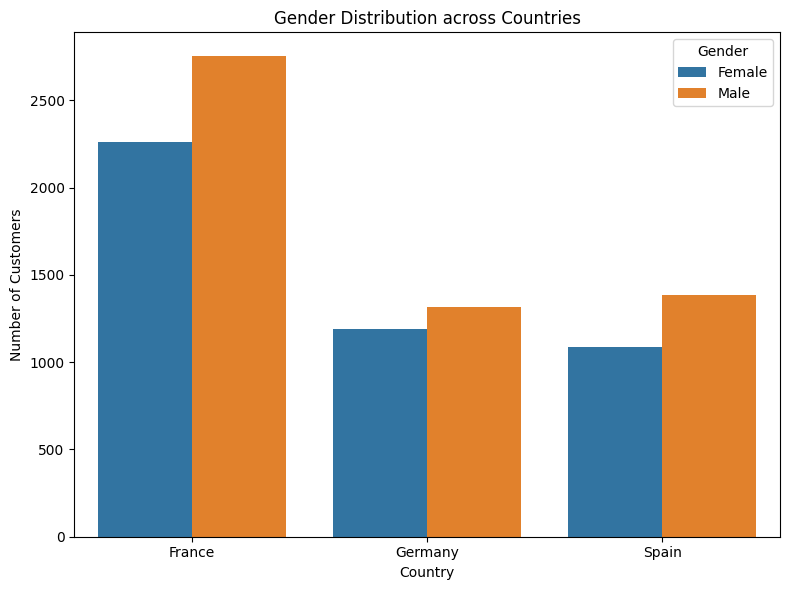

In [10]:
#To visualize gender distribution amongst different countries
plt.figure(figsize=(8, 6))
sns.barplot(data=demographics_gender, x='Geography', y='Count', hue='Gender')
plt.title('Gender Distribution across Countries')
plt.ylabel('Number of Customers')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

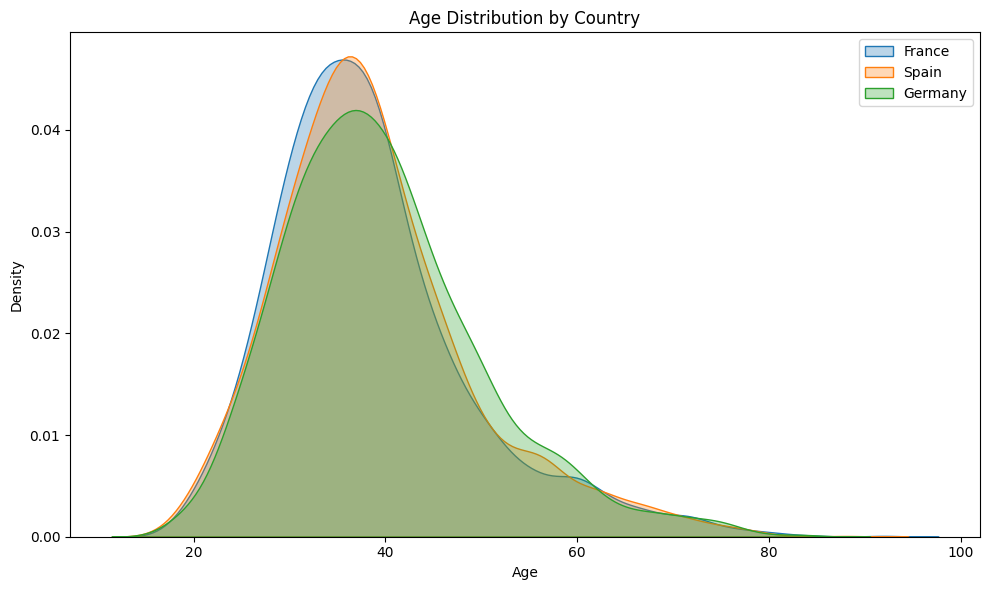

In [11]:
#To visualize age distribution accross different countries
plt.figure(figsize=(10, 6))
for country in ['France', 'Spain', 'Germany']:
    sns.kdeplot(df[df['Geography'] == country]['Age'], label=country, fill=True, alpha=0.3)
plt.title('Age Distribution by Country')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

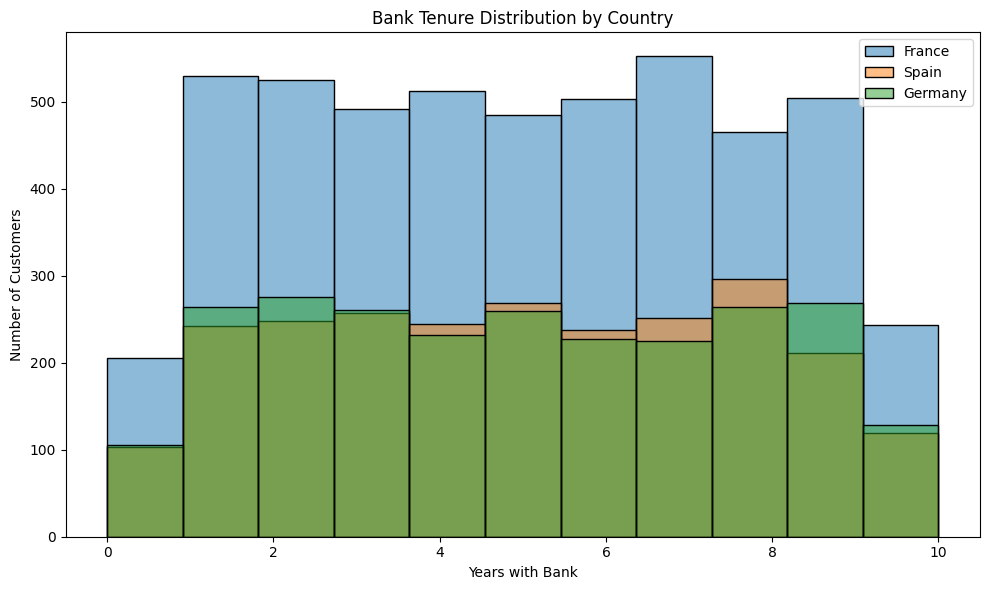

In [12]:
#To visualize Tenure distribution
plt.figure(figsize=(10, 6))
for country in ['France', 'Spain', 'Germany']:
    sns.histplot(df[df['Geography'] == country]['Tenure'], label=country, bins=11, alpha=0.5)
plt.title('Bank Tenure Distribution by Country')
plt.xlabel('Years with Bank')
plt.ylabel('Number of Customers')
plt.legend()
plt.tight_layout()
plt.show() 

# Distribution of Customers By Country

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1551096641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_data, x='Country', y='Count', palette='pastel')


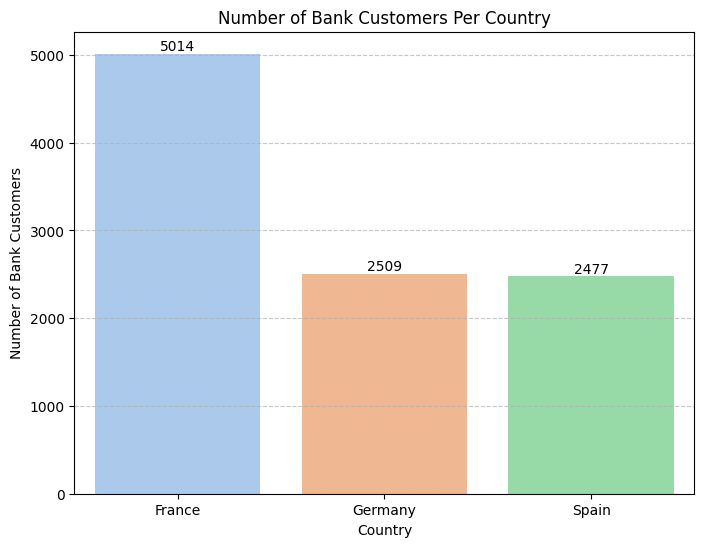

In [13]:
# Visualize number of customers per country
count_data = df['Geography'].value_counts().reset_index()
count_data.columns = ['Country', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=count_data, x='Country', y='Count', palette='pastel')
for i, row in count_data.iterrows():
    plt.text(i, row['Count'], f"{int(row['Count'])}", ha='center', va='bottom')
plt.xlabel('Country')
plt.ylabel('Number of Bank Customers')
plt.title('Number of Bank Customers Per Country')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show() 

# Customers Account Behaviour

In [14]:
#Drop irrelevant columns
df=df.drop(columns=['CustomerId','Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
#Export as csv file before continuing analysis
df.to_csv('cleaned_bank_churn_analysis.csv', encoding='utf-8', index=False)

In [17]:
#Creating a france-only table to view thw customers account behaviour
df_france=df[df['Geography']=='France']
df_france.drop(columns=['Geography'], inplace=True)
df_france.head()

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1127854851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france.drop(columns=['Geography'], inplace=True)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
6,822,Male,50,7,0.00,2,1,1,10062.80,0
8,501,Male,44,4,142051.07,2,0,1,74940.50,0


In [18]:
#Basic summary for france customers
summary_stats=df_france.describe(include='all')
summary_stats

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5014.000000,5014,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,649.668329,NaN,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
std,97.016799,NaN,10.469459,2.888475,64133.565524,0.570347,0.455356,0.499769,57336.289016,0.368072
min,350.000000,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,582.000000,NaN,31.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51399.190000,0.000000
50%,653.000000,NaN,37.000000,5.000000,62153.500000,1.000000,1.000000,1.000000,99132.310000,0.000000
75%,717.000000,NaN,43.000000,7.000000,121444.877500,2.000000,1.000000,1.000000,149295.360000,0.000000


In [19]:
# Group by Country and Gender to get counts
demographics_gender = df.groupby(['Geography', 'Gender']).size().reset_index(name='Count')
demographics_gender 

,Geography,Gender,Count
0,France,Female,2261
1,France,Male,2753
2,Germany,Female,1193
3,Germany,Male,1316
4,Spain,Female,1089
5,Spain,Male,1388


## Visiualization of Customers Account Behaviour in France

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\2890522580.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_france, x='NumOfProducts', palette='Blues')
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\2890522580.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_france, x='HasCrCard', palette='Purples')
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\2890522580.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_france, x='IsActiveMember', palette='Greens')


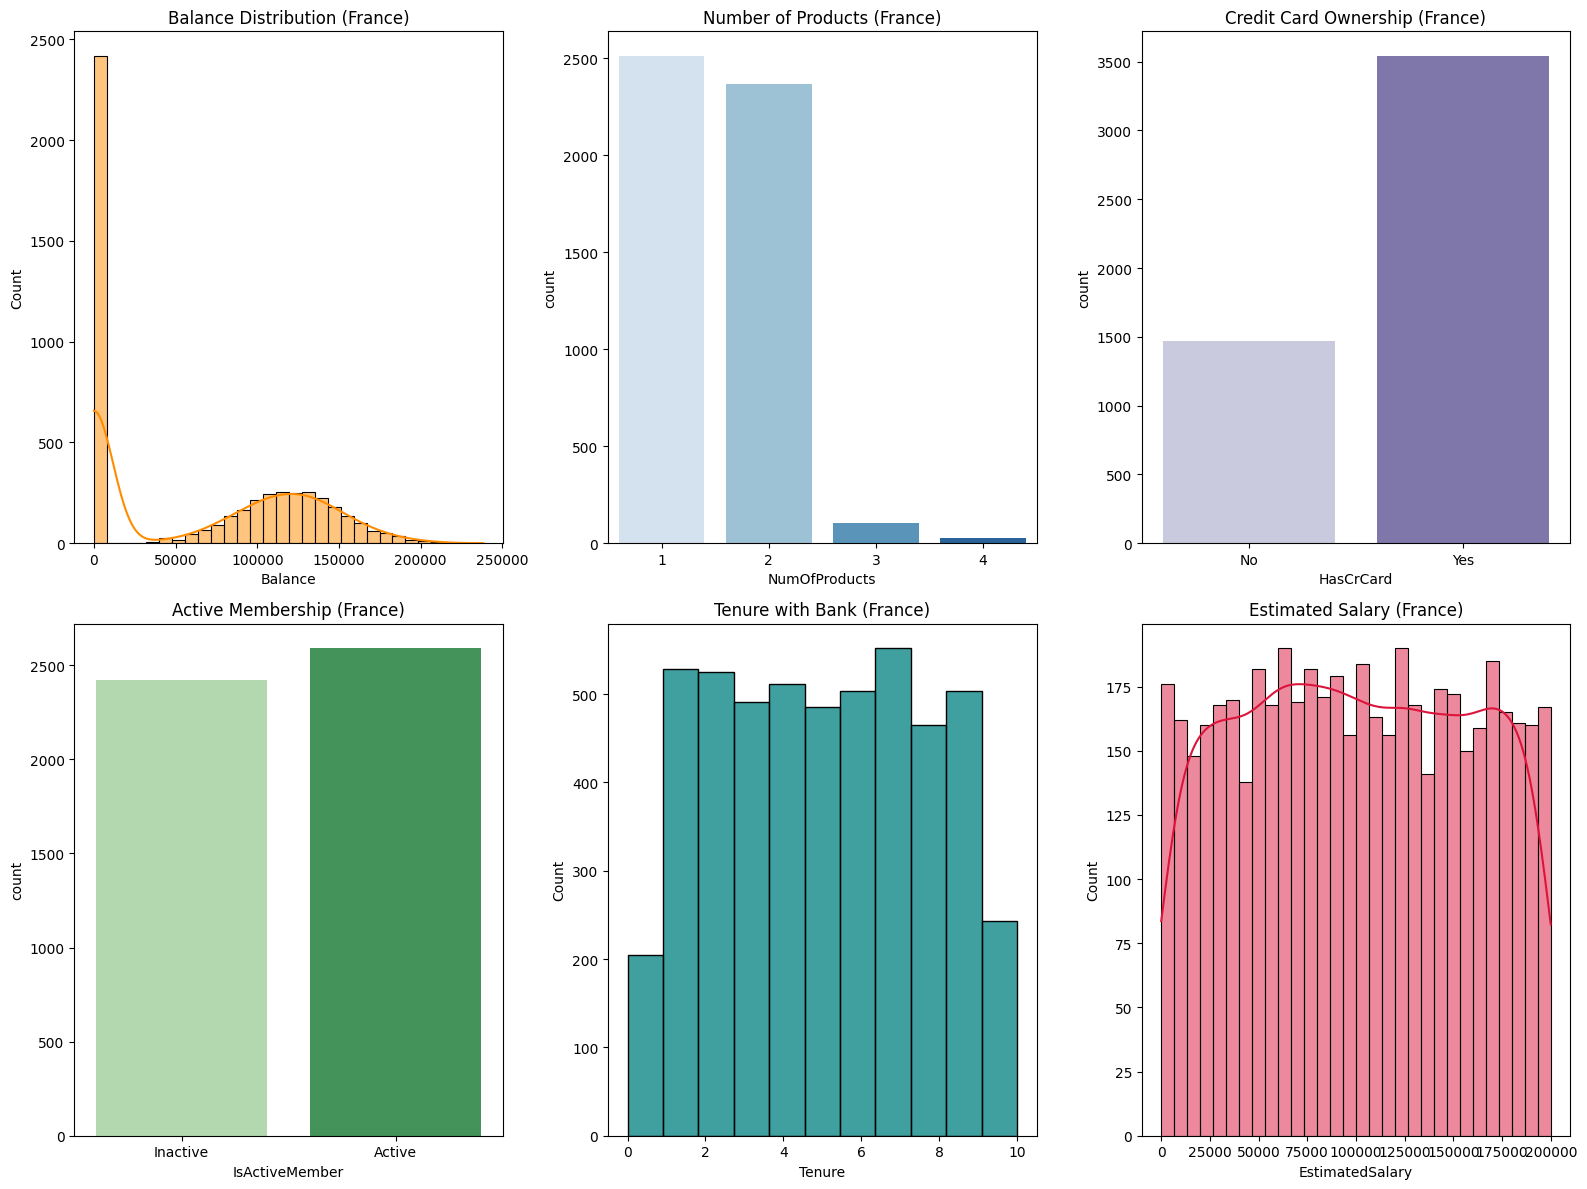

In [20]:
# Set up the figure
plt.figure(figsize=(16, 12))

# 1. Balance Distribution
plt.subplot(2, 3, 1)
sns.histplot(df_france['Balance'], bins=30, kde=True, color='darkorange')
plt.title('Balance Distribution (France)')

# 2. Number of Products Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df_france, x='NumOfProducts', palette='Blues')
plt.title('Number of Products (France)')

# 3. Credit Card Ownership
plt.subplot(2, 3, 3)
sns.countplot(data=df_france, x='HasCrCard', palette='Purples')
plt.title('Credit Card Ownership (France)')
plt.xticks([0, 1], ['No', 'Yes'])

# 4. Active Membership
plt.subplot(2, 3, 4)
sns.countplot(data=df_france, x='IsActiveMember', palette='Greens')
plt.title('Active Membership (France)')
plt.xticks([0, 1], ['Inactive', 'Active'])

# 5. Tenure Distribution
plt.subplot(2, 3, 5)
sns.histplot(df_france['Tenure'], bins=11, kde=False, color='teal')
plt.title('Tenure with Bank (France)')

# 6. Estimated Salary Distribution
plt.subplot(2, 3, 6)
sns.histplot(df_france['EstimatedSalary'], bins=30, kde=True, color='crimson')
plt.title('Estimated Salary (France)')

plt.tight_layout()
plt.show()

In [21]:
#Creating a france-only table to view thw customers account behaviour
df_spain=df[df['Geography']=='Spain']
df_spain.drop(columns=['Geography'], inplace=True)
df_spain.head()

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\4193316417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spain.drop(columns=['Geography'], inplace=True)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Male,44,8,113755.78,2,1,0,149756.71,1
11,497,Male,24,3,0.00,2,1,0,76390.01,0
14,635,Female,35,7,0.00,2,1,1,65951.65,0


## Visiualization of Customers Account Behaviour in Spain

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1502983920.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_spain, x='NumOfProducts', palette='Blues')
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1502983920.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_spain, x='HasCrCard', palette='Purples')
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1502983920.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_spain, x='IsActiveMember', palette='Greens')


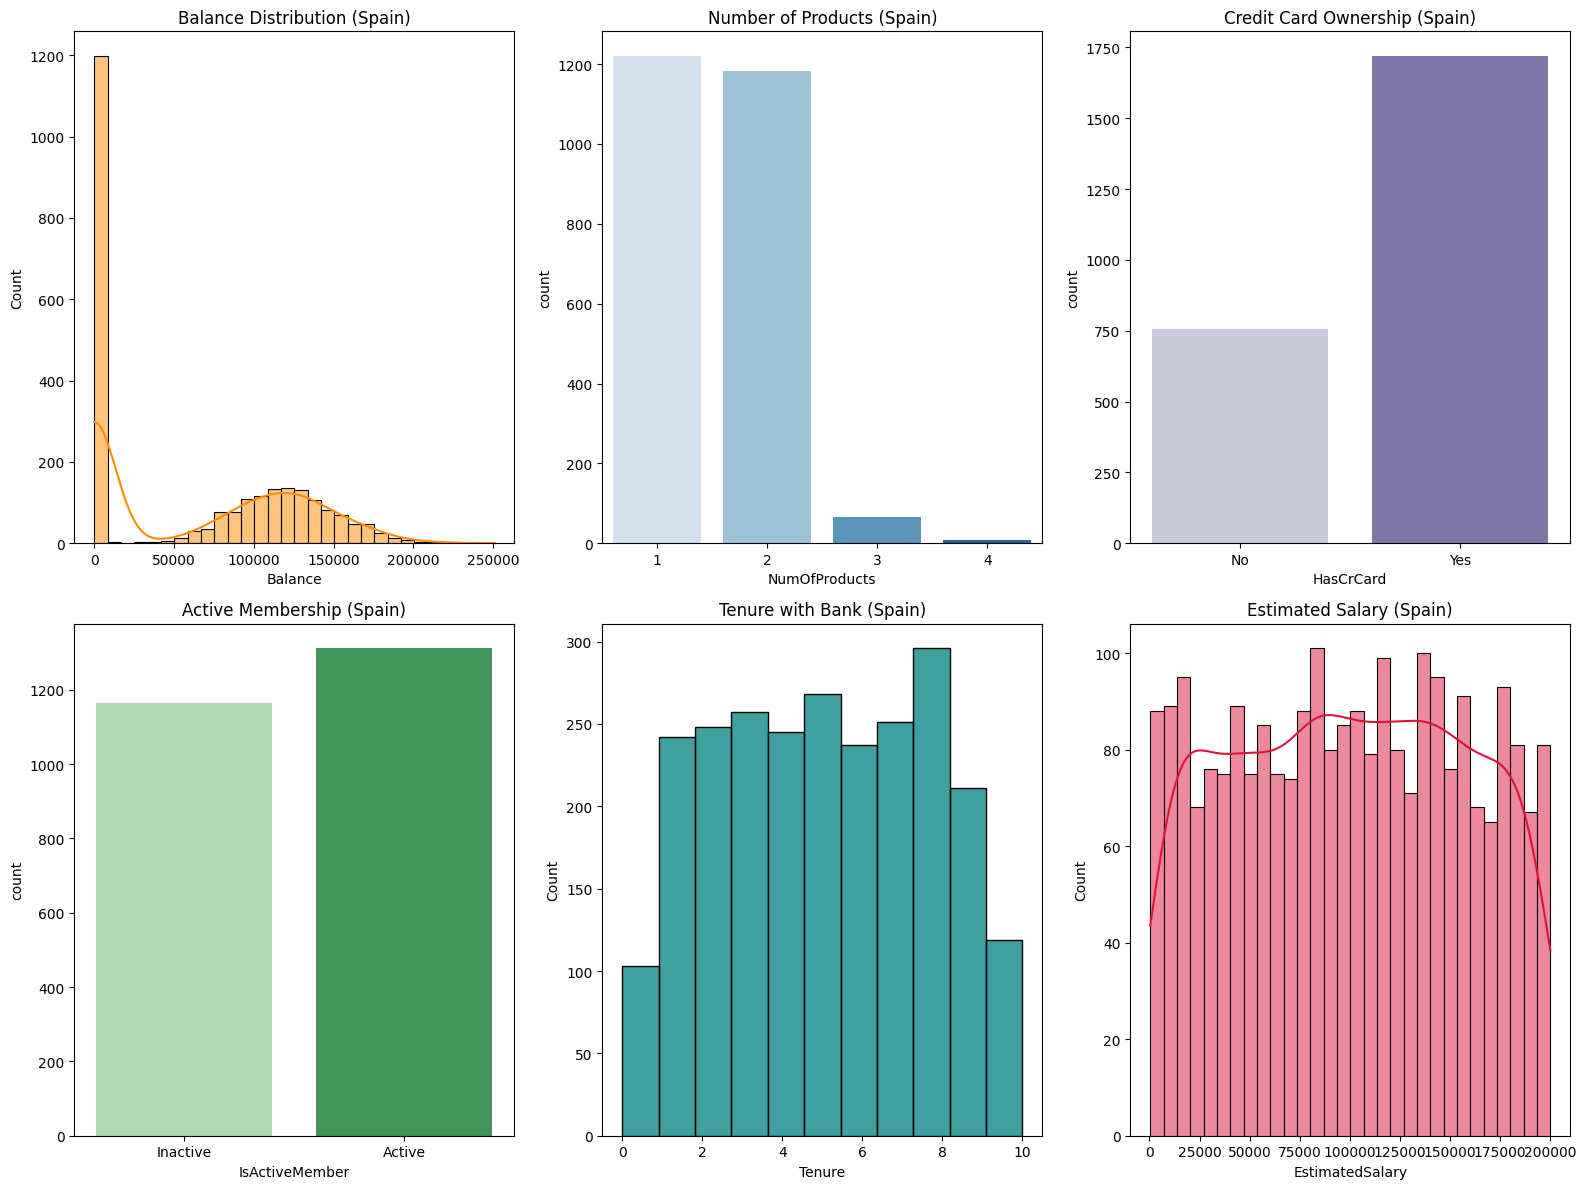

In [22]:
# Set up the figure
plt.figure(figsize=(16, 12))

# 1. Balance Distribution
plt.subplot(2, 3, 1)
sns.histplot(df_spain['Balance'], bins=30, kde=True, color='darkorange')
plt.title('Balance Distribution (Spain)')

# 2. Number of Products Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df_spain, x='NumOfProducts', palette='Blues')
plt.title('Number of Products (Spain)')

# 3. Credit Card Ownership
plt.subplot(2, 3, 3)
sns.countplot(data=df_spain, x='HasCrCard', palette='Purples')
plt.title('Credit Card Ownership (Spain)')
plt.xticks([0, 1], ['No', 'Yes'])

# 4. Active Membership
plt.subplot(2, 3, 4)
sns.countplot(data=df_spain, x='IsActiveMember', palette='Greens')
plt.title('Active Membership (Spain)')
plt.xticks([0, 1], ['Inactive', 'Active'])

# 5. Tenure Distribution
plt.subplot(2, 3, 5)
sns.histplot(df_spain['Tenure'], bins=11, kde=False, color='teal')
plt.title('Tenure with Bank (Spain)')

# 6. Estimated Salary Distribution
plt.subplot(2, 3, 6)
sns.histplot(df_spain['EstimatedSalary'], bins=30, kde=True, color='crimson')
plt.title('Estimated Salary (Spain)')

plt.tight_layout()
plt.show()

In [23]:
#Creating a france-only table to view thw customers account behaviour
df_germany=df[df['Geography']=='Germany']
df_germany.drop(columns=['Geography'], inplace=True)
df_germany.head()

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\2604668375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany.drop(columns=['Geography'], inplace=True)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


## Visiualization of Customers Account Behaviour in Germany

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\3211462524.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_germany, x='NumOfProducts', palette='Blues')
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\3211462524.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_germany, x='HasCrCard', palette='Purples')
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\3211462524.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_germany, x='IsActiveMember', palette='Greens')


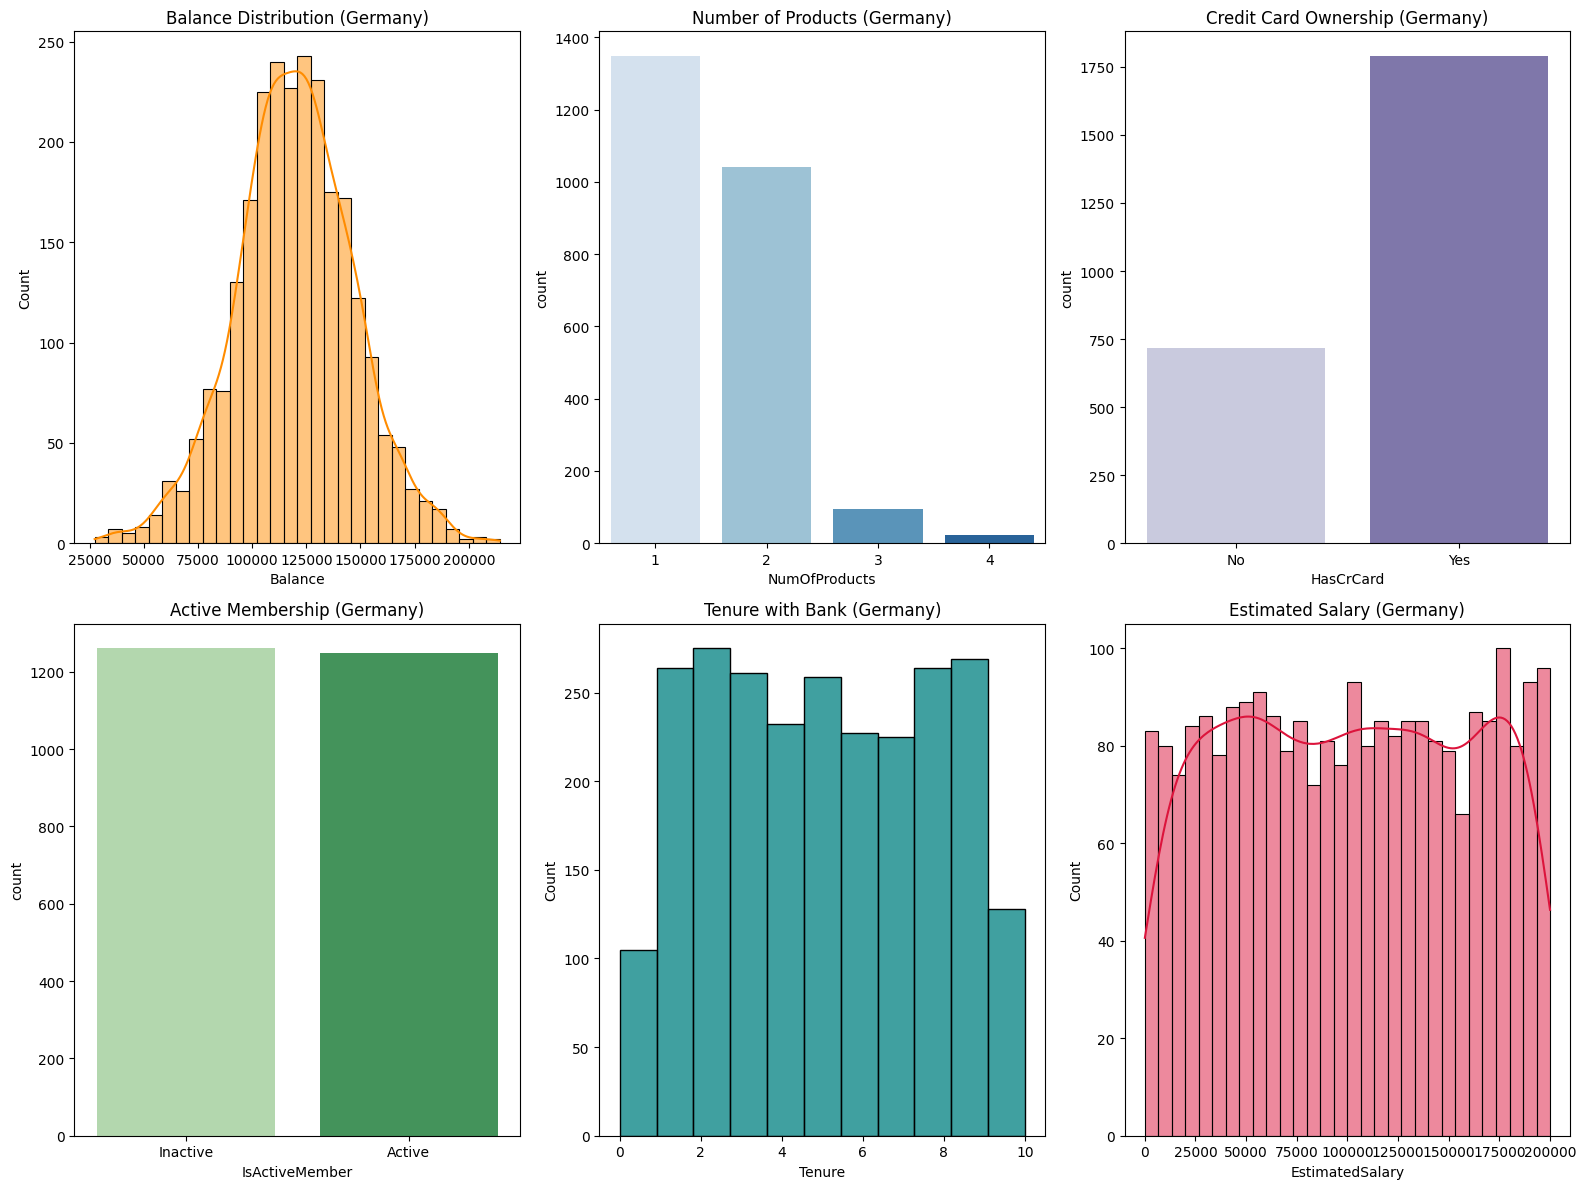

In [24]:
# Set up the figure
plt.figure(figsize=(16, 12))

# 1. Balance Distribution
plt.subplot(2, 3, 1)
sns.histplot(df_germany['Balance'], bins=30, kde=True, color='darkorange')
plt.title('Balance Distribution (Germany)')

# 2. Number of Products Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df_germany, x='NumOfProducts', palette='Blues')
plt.title('Number of Products (Germany)')

# 3. Credit Card Ownership
plt.subplot(2, 3, 3)
sns.countplot(data=df_germany, x='HasCrCard', palette='Purples')
plt.title('Credit Card Ownership (Germany)')
plt.xticks([0, 1], ['No', 'Yes'])

# 4. Active Membership
plt.subplot(2, 3, 4)
sns.countplot(data=df_germany, x='IsActiveMember', palette='Greens')
plt.title('Active Membership (Germany)')
plt.xticks([0, 1], ['Inactive', 'Active'])

# 5. Tenure Distribution
plt.subplot(2, 3, 5)
sns.histplot(df_germany['Tenure'], bins=11, kde=False, color='teal')
plt.title('Tenure with Bank (Germany)')

# 6. Estimated Salary Distribution
plt.subplot(2, 3, 6)
sns.histplot(df_germany['EstimatedSalary'], bins=30, kde=True, color='crimson')
plt.title('Estimated Salary (Germany)')

plt.tight_layout()
plt.show()

# Churners vs Non-churners

## Comparing churners to non-churners using visiualization 

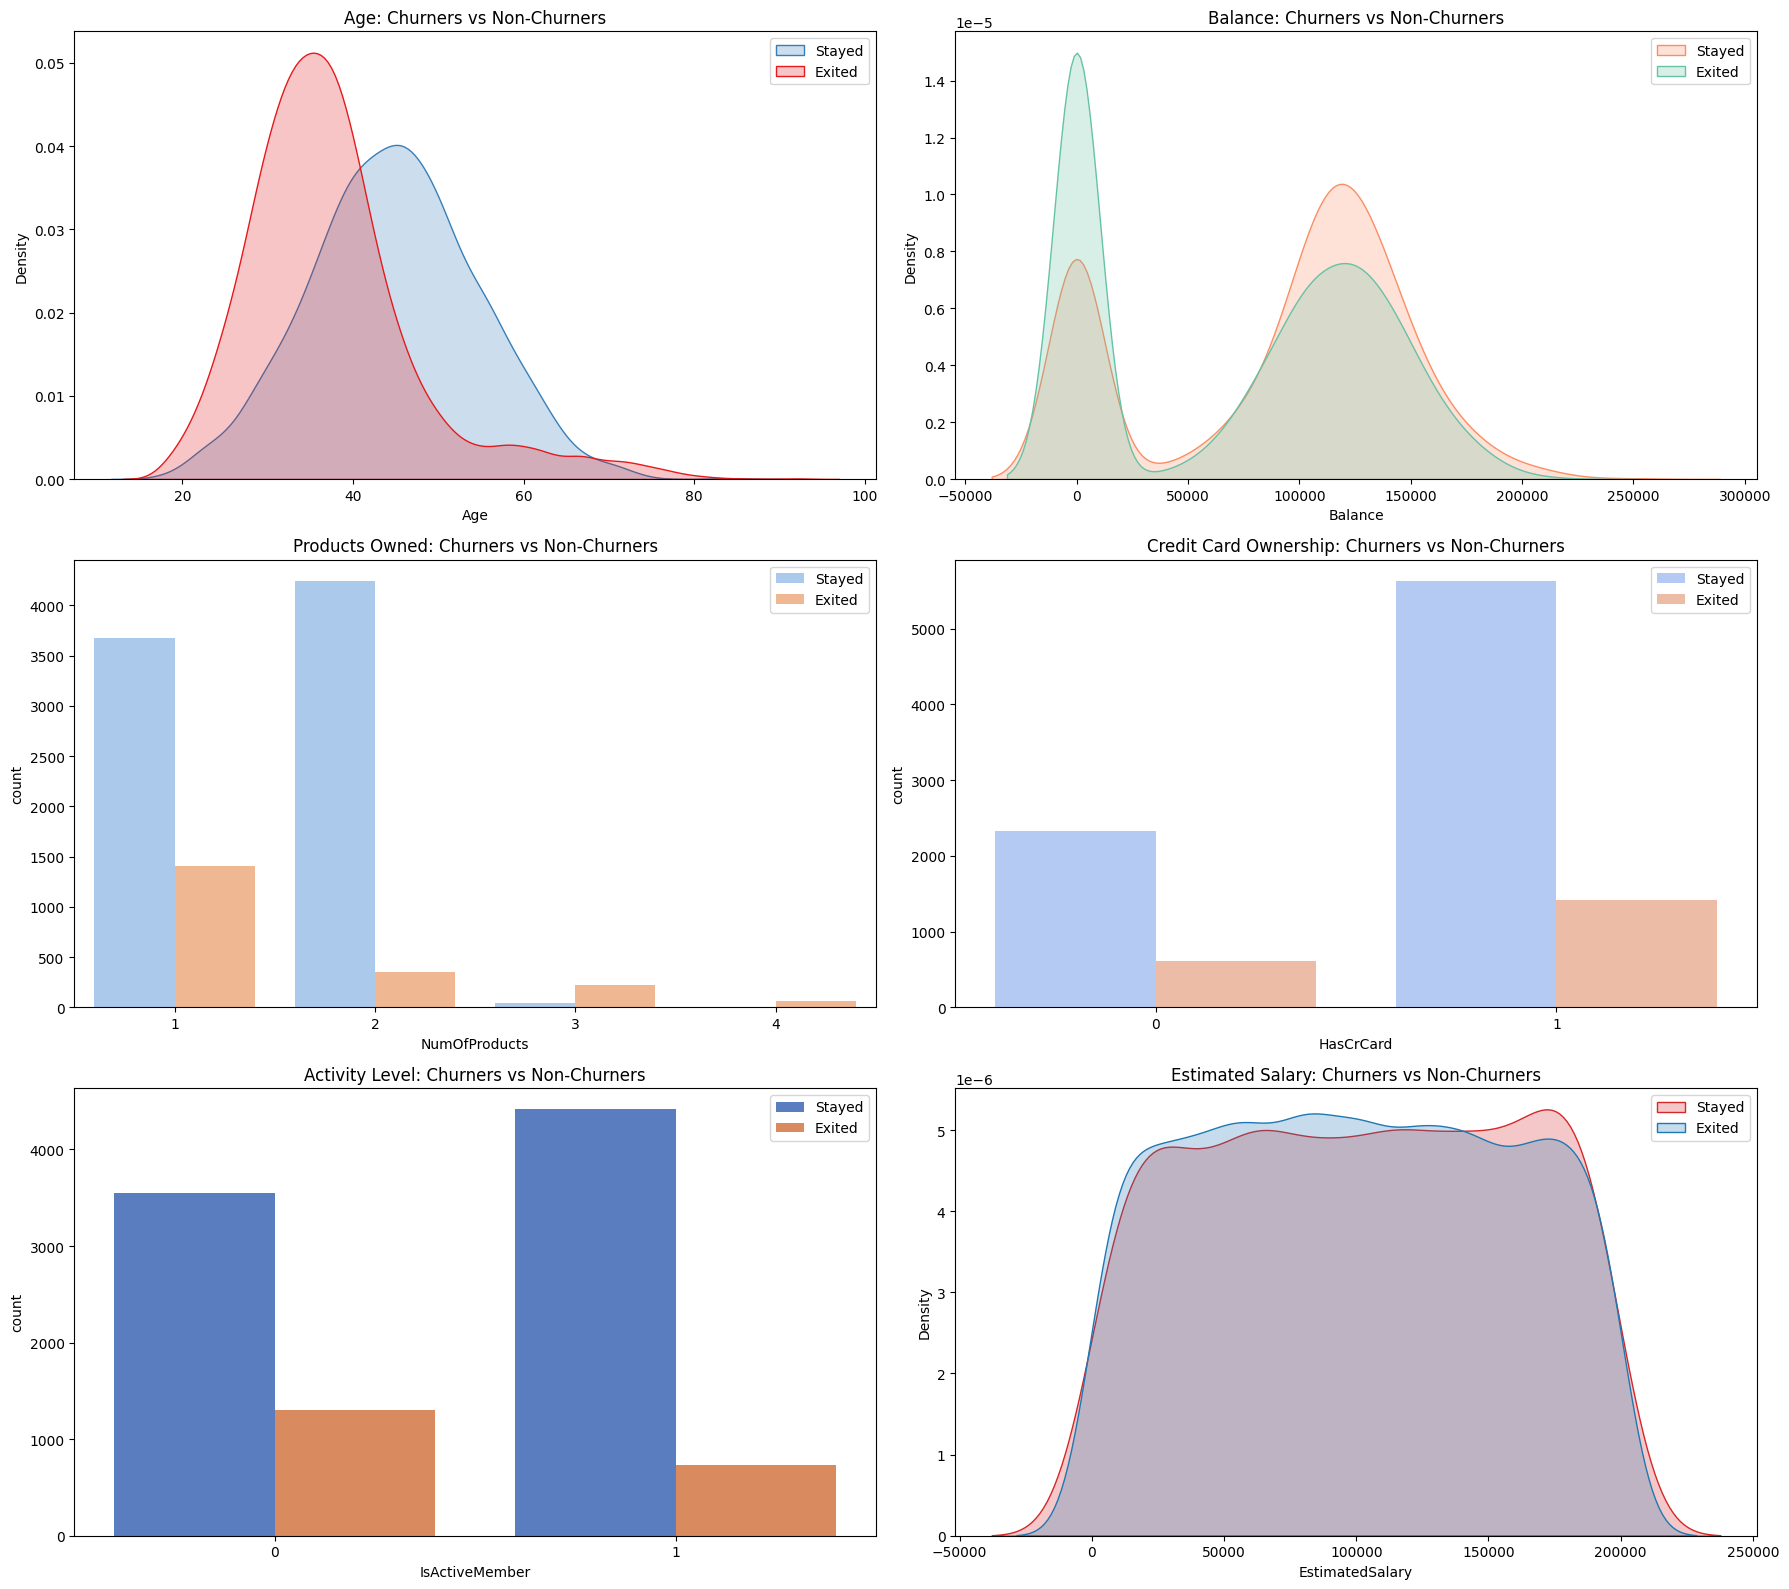

In [25]:
#To visualize attitude that are more common among churners than non-churners
# Set up the figure
plt.figure(figsize=(18, 16))

# 1. Age
plt.subplot(3, 2, 1)
sns.kdeplot(data=df, x='Age', hue='Exited', fill=True, common_norm=False, palette='Set1')
plt.title('Age: Churners vs Non-Churners')
plt.legend(['Stayed', 'Exited'])

# 2. Balance
plt.subplot(3, 2, 2)
sns.kdeplot(data=df, x='Balance', hue='Exited', fill=True, common_norm=False, palette='Set2')
plt.title('Balance: Churners vs Non-Churners')
plt.legend(['Stayed','Exited'])

# 3. Number of Products
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette='pastel')
plt.title('Products Owned: Churners vs Non-Churners')
plt.legend(['Stayed','Exited'])

# 4. Credit Card Ownership
plt.subplot(3, 2, 4)
sns.countplot(data=df, x='HasCrCard', hue='Exited', palette='coolwarm')
plt.title('Credit Card Ownership: Churners vs Non-Churners')
plt.legend(['Stayed','Exited'])

# 5. Activity Level
plt.subplot(3, 2, 5)
sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette='muted')
plt.title('Activity Level: Churners vs Non-Churners')
plt.legend(['Stayed','Exited'])

# 6. Estimated Salary
plt.subplot(3, 2, 6)
sns.kdeplot(data=df, x='EstimatedSalary', hue='Exited', fill=True, common_norm=False, palette={0:'#1f77b4', 1: '#d62728'})
plt.title('Estimated Salary: Churners vs Non-Churners')
plt.legend(['Stayed','Exited'])

plt.tight_layout()
plt.show()

## Checking to see if churning can be predicted using the dataset variables
Here, sklearn library was used to label-encode, standardize, split the dataset into train and test sets, classify and assess the classification report while seaborn and matplotlib were used for visualization of clustering.

In [26]:
#To check if churning can be predicted using the dataset variables 
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Encode categorical variables
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # One-hot encode Geography

In [28]:
# Features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1551   56]
 [ 211  182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### 📌 Can Churn Be Predicted from the Given Dataset?

Yes! churn can be predicted with reasonable accuracy using the variables in the dataset. Based on the Random Forest model's feature importance analysis, `Age` is the strongest predictor, followed by `EstimatedSalary`, `CreditScore`, `Balance`, and `NumOfProducts`. These financial and demographic features show clear patterns that differentiate churners from non-churners. Customers who are older, have higher balances, fewer products, or specific salary profiles are more likely to leave the bank. The model achieved a high overall accuracy of 87% and strong precision for churners (0.76), although recall for churners remains moderate (0.46), indicating room for improvement in correctly identifying all customers at risk of churn.

Interestingly, while features like `Gender`, `HasCrCard`, and geographical indicators (e.g., `Geography_Spain`, `Geography_Germany`) were found to have very low predictive power, `EstimatedSalary` showed significant importance in this specific dataset. Overall, the dataset provides a solid foundation for churn prediction, but adding more behavioral or engagement-focused features could further enhance model performance and improve the recall of churn-prone customers.

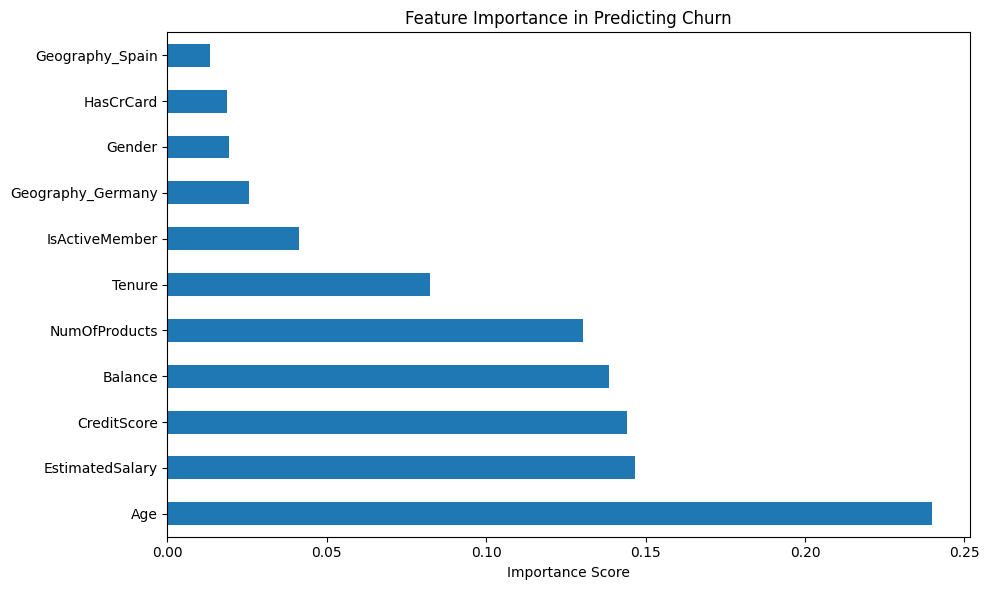

In [32]:
# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh')
plt.title('Feature Importance in Predicting Churn')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# To Assess the Type of Customer Segments That Exist

**KMeans** algorithm was used to assess the type of customer segment that exist, and the classification was done based on the countries (France, Spain, and Germany) for a much in-depth annalysis 

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\3303766045.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Cluster'] = clusters
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\3303766045.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['PCA1'] = X_pca[:, 0]
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\3303766045.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

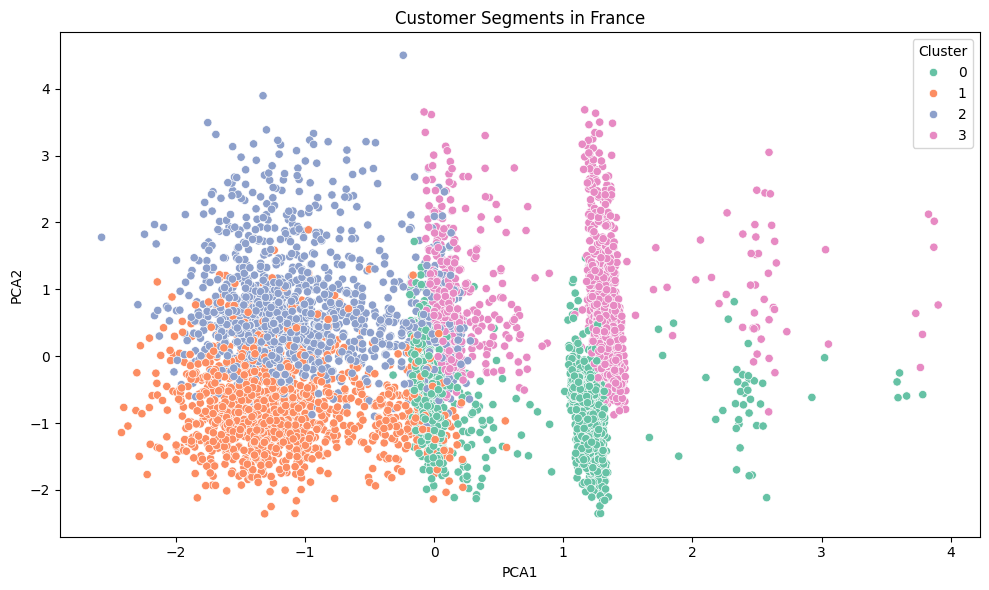

               Age        Balance  EstimatedSalary  NumOfProducts    Tenure  \
Cluster                                                                       
0        37.117181    7472.609731    100764.651940       1.812352  5.038005   
1        37.604310  124426.154414    101218.760716       1.196552  5.071552   
2        39.195021  121756.788763     99314.341925       1.198340  4.801660   
3        39.948052    7823.451530     98514.569084       1.843434  5.094517   

         IsActiveMember    Exited  
Cluster                            
0                   0.0  0.204276  
1                   0.0  0.218966  
2                   1.0  0.108714  
3                   1.0  0.120491  


In [33]:
#To check the types of segments that exist within bank customers in France
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ----- Step 1: Filter by country -----
country = 'France' 
df_country = df_france

# ----- Step 2: Select features for segmentation -----
features = ['Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'IsActiveMember']
X = df_country[features]

# ----- Step 3: Scale features -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- Step 4: Apply K-Means -----
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_country['Cluster'] = clusters

# ----- Step 5: Visualize using PCA (2D) -----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_country['PCA1'] = X_pca[:, 0]
df_country['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_country, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f'Customer Segments in {country}')
plt.tight_layout()
plt.show()

# Optional: View cluster characteristics
cluster_summary = df_country.groupby('Cluster')[features + ['Exited']].mean()
print(cluster_summary)

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1483940249.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Cluster'] = clusters
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1483940249.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['PCA1'] = X_pca[:, 0]
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1483940249.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

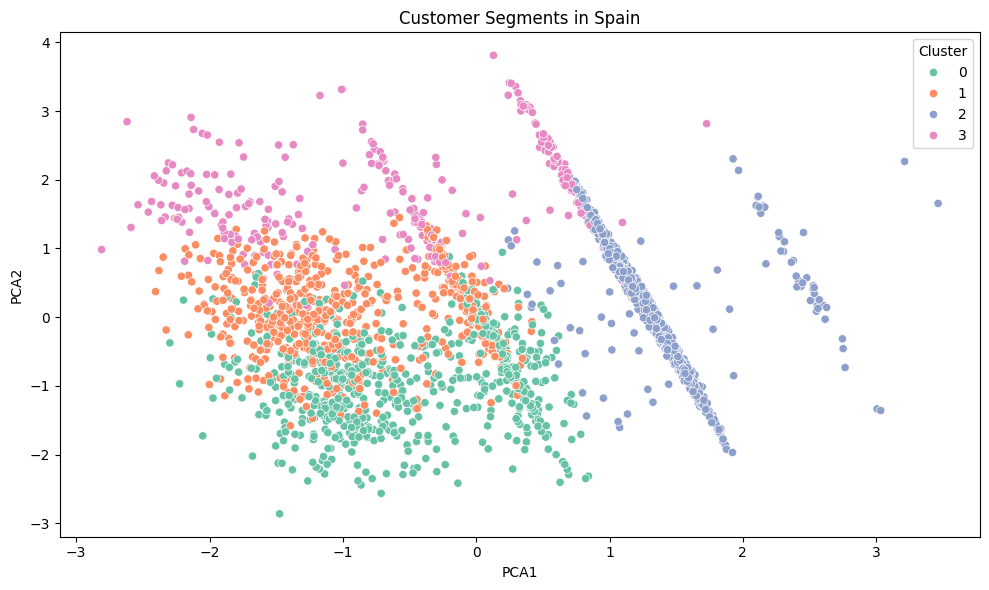

               Age        Balance  EstimatedSalary  NumOfProducts    Tenure  \
Cluster                                                                       
0        37.775510   95402.132405     99958.792420       1.223032  5.021866   
1        35.316693  101835.728066    101398.884945       1.171607  5.018721   
2        35.709195    4996.634920     98618.476184       2.085057  5.220690   
3        59.692857   64478.268250     96242.165750       1.460714  4.503571   

         IsActiveMember    Exited  
Cluster                            
0              0.000000  0.290087  
1              1.000000  0.101404  
2              0.479310  0.088506  
3              0.907143  0.257143  


In [34]:
# ----- Step 1: Filter by country -----
country = 'Spain' 
df_country = df_spain

# ----- Step 2: Select features for segmentation -----
features = ['Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'IsActiveMember']
X = df_country[features]

# ----- Step 3: Scale features -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- Step 4: Apply K-Means -----
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_country['Cluster'] = clusters

# ----- Step 5: Visualize using PCA (2D) -----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_country['PCA1'] = X_pca[:, 0]
df_country['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_country, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f'Customer Segments in {country}')
plt.tight_layout()
plt.show()

# Optional: View cluster characteristics
cluster_summary = df_country.groupby('Cluster')[features + ['Exited']].mean()
print(cluster_summary)

C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1538656074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Cluster'] = clusters
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1538656074.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['PCA1'] = X_pca[:, 0]
C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\1538656074.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

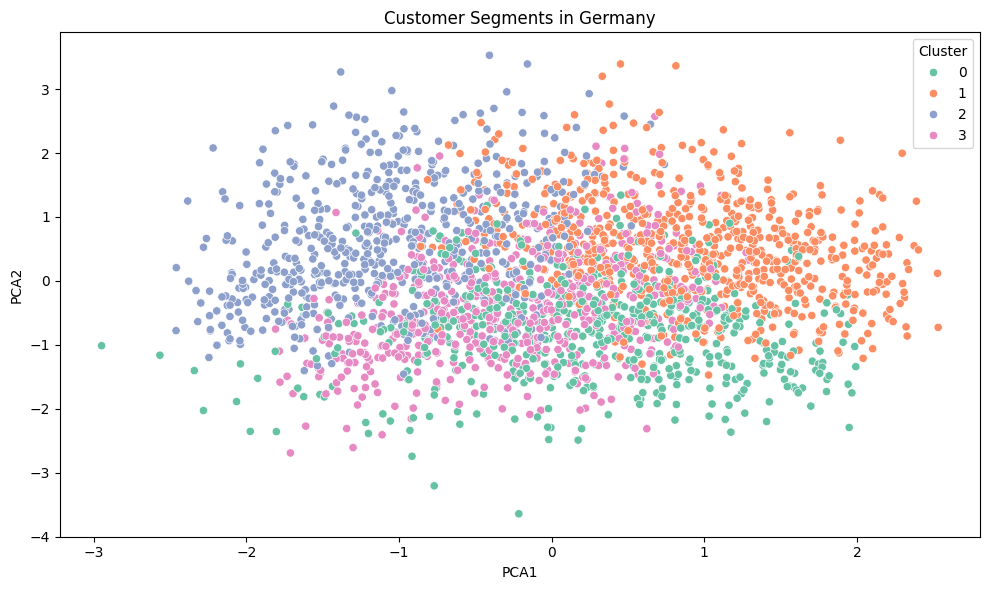

               Age        Balance  EstimatedSalary  NumOfProducts    Tenure  \
Cluster                                                                       
0        38.354895  118762.610769    100309.361189       2.216783  5.291958   
1        40.595833  120162.452472    102059.546972       1.000000  5.104167   
2        42.387150  121668.094152     53025.276919       1.476112  4.171334   
3        37.524590  118198.605066    148602.356000       1.522951  5.468852   

         IsActiveMember    Exited  
Cluster                            
0              0.054196  0.298951  
1              0.000000  0.520833  
2              1.000000  0.243822  
3              1.000000  0.196721  


In [35]:
# ----- Step 1: Filter by country -----
country = 'Germany' 
df_country = df_germany

# ----- Step 2: Select features for segmentation -----
features = ['Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'IsActiveMember']
X = df_country[features]

# ----- Step 3: Scale features -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- Step 4: Apply K-Means -----
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_country['Cluster'] = clusters

# ----- Step 5: Visualize using PCA (2D) -----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_country['PCA1'] = X_pca[:, 0]
df_country['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_country, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f'Customer Segments in {country}')
plt.tight_layout()
plt.show()

# Optional: View cluster characteristics
cluster_summary = df_country.groupby('Cluster')[features + ['Exited']].mean()
print(cluster_summary)